<a href="https://colab.research.google.com/github/factorLee/DeepLearningfromScratch01_PKNU/blob/main/AI_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 인공지능개론 과제#02
### 201730262 이상주

### (정답은 가장 하단부에 작성했습니다.)

## 함수 및 Gradient descent 알고리즘 구현

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 함수 정의
def funtion(x):
    return np.sin(1/2*x[0]**2 - 1/4*x[1]**2 + 3)*np.cos(2*x[0] + 1 - np.exp(x[1]))

In [ ]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        temp_val = x[idx]

        x[idx] = temp_val + h
        fxh1 = f(x)

        x[idx] = temp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2)/(2*h)
        x[idx] = temp_val

    return grad

In [ ]:
def gradient_descent(f, init_x, lr, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append(x.copy()) # 대략적인 경로 및 발산여부를 확인에 사용하기위해 x_history 변수 생성

        grad = numerical_gradient(f, x)
        x -= lr*grad # 경사하강법 

    return x, np.array(x_history)

## 네개의 초기점에 따른 learning rate 값 찾기

[1.00888312 0.99615572]


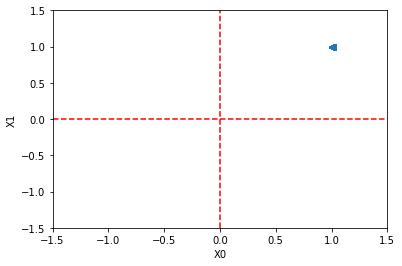

In [ ]:
# 직관적으로 살펴보기위해 그래프 사용
# 초기값 1.0, 1.0
init_x = np.array([1.0,1.0])

x, x_history = gradient_descent(funtion, init_x=init_x, lr=0.0001)
print(x)
plt.plot([-1.5,1.5],[0,0], '--r')
plt.plot([0,0],[-1.5,1.5], '--r')
plt.plot(x_history[:,0], x_history[:,1],'<')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

[-0.82293872 -0.49946569]


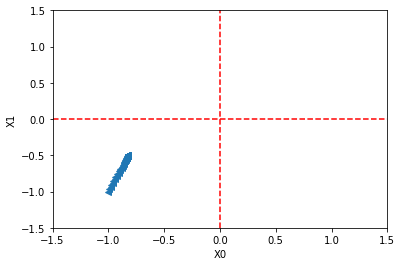

In [ ]:
# 초기값 -1.0, -1.0
init_x = np.array([-1.0,-1.0])

x, x_history = gradient_descent(funtion, init_x=init_x, lr=0.51)
print(x)
plt.plot([-1.5,1.5],[0,0], '--r')
plt.plot([0,0],[-1.5,1.5], '--r')
plt.plot(x_history[:,0], x_history[:,1],'<')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

[ 0.75504055 -1.37716467]


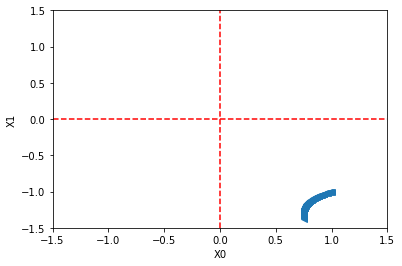

In [ ]:
# 초기값 1.0, -1.0
init_x = np.array([1.0,-1.0])

x, x_history = gradient_descent(funtion, init_x=init_x, lr=0.009)
print(x)
plt.plot([-1.5,1.5],[0,0], '--r')
plt.plot([0,0],[-1.5,1.5], '--r')
plt.plot(x_history[:,0], x_history[:,1],'<')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

[7.05605451e-04 1.46218191e+00]


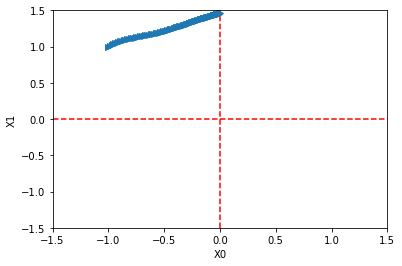

In [ ]:
# 초기값 -1.0, 1.0
init_x = np.array([-1.0,1.0])

x, x_history = gradient_descent(funtion, init_x=init_x, lr=0.0201)
print(x)
plt.plot([-1.5,1.5],[0,0], '--r')
plt.plot([0,0],[-1.5,1.5], '--r')
plt.plot(x_history[:,0], x_history[:,1],'>')

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

# 문제 1)
- 초기점 1.0, 1.0의 learning rate: 0.0001
- 초기점 -1.0, -1.0의 learning rate: 0.51
- 초기점 1.0, -1.0의 learning rate: 0.009
- 초기점 -1.0, 1.0의 learning rate: 0.0201

# 문제 2)
- 네개의 초기점에 따라 서로 다른 최적해가 나왔으며, 이는 문제에 주에진 함수와 Gradient descent의 특성과 관련 있다고 생각합니다. 문제에서 주어진 함수는 강의 시간에 다루었던 단순한 Convex funtion이 아닌 복잡한 등고선을 갖는 함수이고 극소값을 향해가는 Gradient descent의 특성상 초기점(값)을 어디로 설정해 주느냐에따라 서로 다른 방향의 극소값의 방향으로 향할 수 있고 그에따라 함수를 줄이는 전체 최적 값(Global minima)은 아니지만 Global minima와 같이 접선의 기울기가 0이되는 Local minima에 빠질 수 있기 때문에 서로 다른 최적해가 나왔다고 생각합니다. 

In [ ]:
dltkdwn21123